## 1. Data Preparation

#### Check the correlation
* for the features excluding SalePrice, if there is strong correlation between some of them, keep only one feature of these.
* get the ones that has strong correlation with SalePrice
    * `df.corr()` checks the correlation between the numeric values.
        * seaborn: __[https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas](https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas)__
        <div class="alert alert-block alert-warning">
        ```
        import seaborn as sns
        corr = dataframe.corr()
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values)
        ```</div>
       
        * be careful that sometimes when the correlation is 0, there is actually significant correlation in it. __[https://en.wikipedia.org/wiki/Correlation_and_dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)__
        
| Value of r	                | Strength of relationship |
| ----------------------------- | ------------------------ |
| -1.0 to -0.5 or 1.0 to 0.5	| Strong                   |
| -0.5 to -0.3 or 0.3 to 0.5	| Moderate                 |
| -0.3 to -0.1 or 0.1 to 0.3	| Weak                     |
| -0.1 to 0.1	               | None or very weak        |
__[https://explorable.com/statistical-correlation](https://explorable.com/statistical-correlation)__
                
 * pearson for the p-value: __[https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)__
 * **ANOVA** for the 'object' values.
    
#### Remove the values that have very few data entries in object-type features.    
   


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
import scipy.stats as stats

%matplotlib inline

df = pd.read_csv('train.csv')




### Data Info

In [6]:
print(df.info())
print(df.columns)
print(df.Alley)
print(type(df.YearBuilt.unique()[0]))


# find out how many elements in every variable
for col in df.columns:
    uni = df[col].dropna().unique()
    
    if type(uni[0]) == str:
        print(col, np.shape(uni)[0])
    else:
        print(col,[df[col].min(),df[col].max()])
        
    
# df.LotShape.unique()
# df.RoofStyle.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Study the correlation between every 2 feature in the data, except the SalePrice. This way we get rid of the features that has repeating impact with the house SalePrice.

#### Core Methods
* df.corr()
* seaborn.heatmap()

#### We get a Dictionary and a Heatmap for feature coorelated with each other. And here comes the question:
* How do we get rid of the redundant features but keep one in the data?

{'1stFlrSF': ['TotalBsmtSF', '1stFlrSF', 'GrLivArea'],
 '2ndFlrSF': ['2ndFlrSF',
              'GrLivArea',
              'HalfBath',
              'BedroomAbvGr',
              'TotRmsAbvGrd'],
 '3SsnPorch': ['3SsnPorch'],
 'BedroomAbvGr': ['2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd'],
 'BsmtFinSF1': ['BsmtFinSF1', 'TotalBsmtSF', 'BsmtFullBath'],
 'BsmtFinSF2': ['BsmtFinSF2'],
 'BsmtFullBath': ['BsmtFinSF1', 'BsmtFullBath'],
 'BsmtHalfBath': ['BsmtHalfBath'],
 'BsmtUnfSF': ['BsmtUnfSF'],
 'EnclosedPorch': ['EnclosedPorch'],
 'Fireplaces': ['Fireplaces'],
 'FullBath': ['OverallQual', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd'],
 'GarageArea': ['OverallQual', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
 'GarageCars': ['OverallQual',
                'YearBuilt',
                'GarageYrBlt',
                'GarageCars',
                'GarageArea'],
 'GarageYrBlt': ['OverallQual',
                 'YearBuilt',
                 'YearRemodAdd',
                 'GarageYrBlt',
 

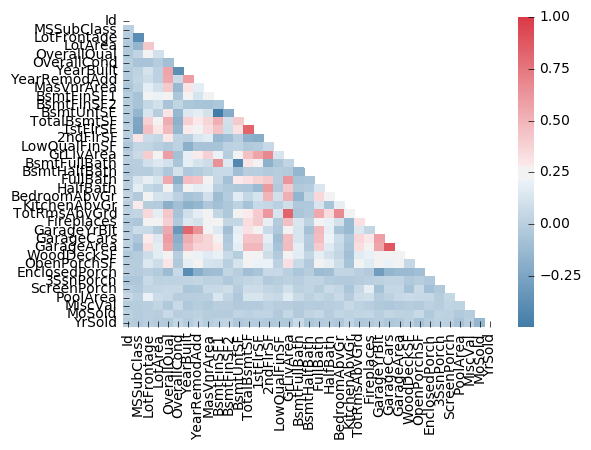

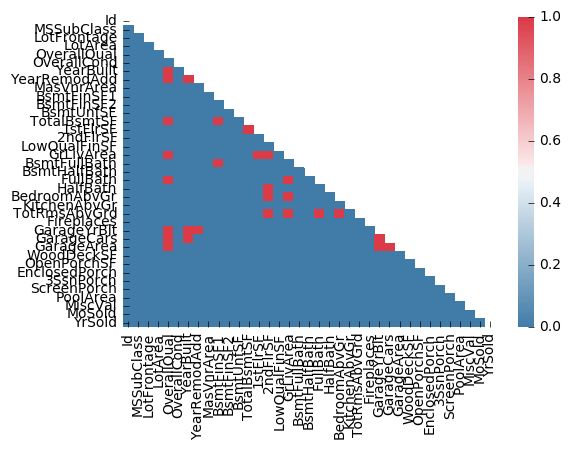

In [68]:
import seaborn as sns
df_no_SP = df.drop('SalePrice',axis=1)
corr_all = df_no_SP.corr()

# corr_all = df.corr()

# Thresholding the correlations larger than 0.5
corr_all_true = corr_all>0.5

corr_dict = {}
for column in corr_all_true:
    corr_list = corr_all_true[column][corr_all_true[column]==True].index.tolist()
    corr_dict[column] = corr_list

pprint.pprint(corr_dict)

# create custom color map
cmap = sns.diverging_palette(240, 10, as_cmap=True)
fig1 = plt.figure()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask=mask, cmap=cmap,
          xticklabels=corr_all.columns.values,
          yticklabels=corr_all.columns.values)


fig2 = plt.figure()
sns.heatmap(corr_all_true, mask=mask,cmap=cmap,
          xticklabels=corr_all.columns.values,
          yticklabels=corr_all.columns.values)


### In the cell above, we get the columns with significant reletivity. Now we are going to remove some correlated columns until no column is highly related to each other. 
#### Note 1: only the columns with numeric values are kept after the `corr_all = df_no_SP.corr()`. So that we are only dealing with numeric features of the house now. 
#### Note 2: There are some features that is better to be kept----'YearBuilt' for sure. So make sure we have that in our columns list.

In [69]:
# Build a list of all the numeric column names for our dataframe, except SalePrice
cols = list(corr_all.columns)
print(cols)
# See how many columns there are at first
len_1=len(cols)

# In the correlation dictionary, if the key is still in the columns_list, remove the items in the value from the columns_list that is not equal
# to the key itself.
for key, value in corr_dict.items():
    if key in cols:
        for feature in value:
            if (feature in cols) & (feature != key and feature != 'YearBuilt'):
                cols.remove(feature)
# Take a look how many features (columns) are removed from the last step.
len_2 = len(cols)
print(cols)
print(len_1-len_2)



['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
9


#### Make new correlation heatmap with the new column list to check the result. if correct, use the new column list as the lightened DataFrame to do our house price study.


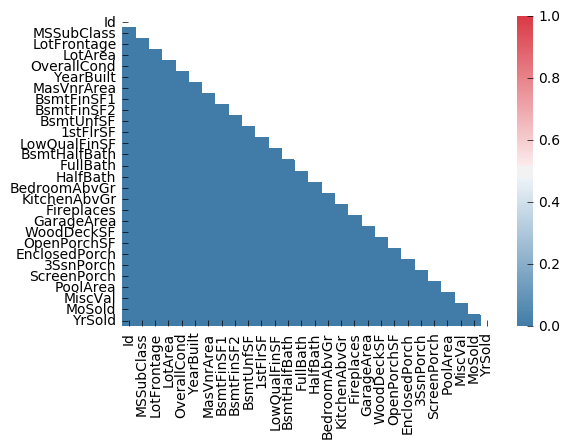

In [74]:
# select the dependent columns from previous DataFrame with no SalePrice, calculate the cross correlation, setup same threshold
# as before, and plot the heat map for the ture-false map. 
simple_corr = df_no_SP[cols].corr()>0.5
fig3 = plt.figure()
cmap = sns.diverging_palette(240, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(simple_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(simple_corr, mask=mask,cmap=cmap,
          xticklabels=simple_corr.columns.values,
          yticklabels=simple_corr.columns.values)

### The coorelation between the remaining numeric features and the SalePrice
#### Using `Pearson Correlation Coefficient` to evaluate

In [10]:
# Rebuild the numeric dataframe with SalePrice
simple_df = df[cols]


pear_dict={}
for col in simple_df.columns:
    pear_dict[col] = stats.pearsonr(df[col], df['SalePrice'])
# pprint.pprint(pear_dict)
pear_df = pd.DataFrame(pear_dict,index=['correlation','p-value'])
print(pear_df.T.sort_values(['correlation','p-value'],ascending=[False,True]))

               correlation        p-value
GarageArea        0.623431  5.265038e-158
1stFlrSF          0.605852  5.394711e-147
FullBath          0.560664  1.236470e-121
YearBuilt         0.522897  2.990229e-103
Fireplaces        0.466929   6.141487e-80
BsmtFinSF1        0.386420   3.394110e-53
WoodDeckSF        0.324413   3.972217e-37
OpenPorchSF       0.315856   3.493374e-35
HalfBath          0.284108   1.650473e-28
LotArea           0.263843   1.123139e-24
BsmtUnfSF         0.214479   1.182976e-16
BedroomAbvGr      0.168213   9.927497e-11
ScreenPorch       0.111447   1.972140e-05
PoolArea          0.092404   4.073490e-04
MoSold            0.046432   7.612758e-02
3SsnPorch         0.044584   8.858170e-02
BsmtFinSF2       -0.011378   6.639987e-01
BsmtHalfBath     -0.016844   5.201536e-01
MiscVal          -0.021190   4.184863e-01
Id               -0.021917   4.026938e-01
LowQualFinSF     -0.025606   3.282073e-01
YrSold           -0.028923   2.694132e-01
OverallCond      -0.077856   2.912

# Note from Meeting Dec 06 2017
* Negative values are useful too, and we can probably use all the features that has an correlation larger than 0.1
* ANOVA: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
* **r-squared** tells how much variance in the target is explained by the model. For example, the model of Fireplaces explain 20% variance in the SalePrice.
* (Not for the current issue, but good to know that: if the categorical is to be predicted, use logistic regression. step function.)
* for the categorical feature with non-numeric values, the OLS will break it into numbers of categories, and evaluate them seperately. Use only the category that has significant contribution to the SalePrice(use this as 1, the other values in this feature can be treated as 0)
* Get a matrix of the useful features, and use it with train data (seperate the dataset into train and test first)
* use `print(model.rsquared)` to get the r-squared, `model.pvalues` for the p-value

#### Now that we have the correlations and p-values for these features, what is the threshold to choose the useful features if we need a threshold. If not, how do we make use of the correlation? 
#### For now, top 9 features are selected for plot display. 
* first, use scatter plot to have overview of the 9 features

AttributeError: 'DataFrame' object has no attribute 'TotalBsmtSF'

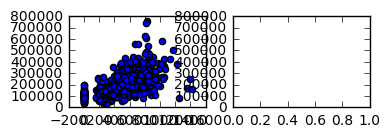

In [75]:
plt.subplot(3,3,1)
plt.ylim(0,800000)
plt.scatter(simple_df.GarageArea, df.SalePrice)
plt.subplot(3,3,2)
plt.ylim(0,800000)
plt.scatter(simple_df.TotalBsmtSF,df.SalePrice)
plt.subplot(3,3,3)
plt.ylim(0,800000)
plt.scatter(simple_df.TotRmsAbvGrd,df.SalePrice)
plt.subplot(3,3,4)
plt.ylim(0,800000)
plt.scatter(simple_df.YearBuilt,df.SalePrice)
plt.subplot(3,3,5)
plt.ylim(0,800000)
plt.scatter(simple_df.Fireplaces,df.SalePrice)
plt.subplot(3,3,6)
plt.ylim(0,800000)
plt.scatter(simple_df.WoodDeckSF,df.SalePrice)
plt.subplot(3,3,7)
plt.ylim(0,800000)
plt.scatter(simple_df.OpenPorchSF,df.SalePrice)
plt.subplot(3,3,8)
plt.ylim(0,800000)
plt.scatter(simple_df.HalfBath,df.SalePrice)
plt.subplot(3,3,9)
plt.ylim(0,800000)
plt.scatter(simple_df.LotArea,df.SalePrice)

#### A close look to 'TotRmsAbvGrd'

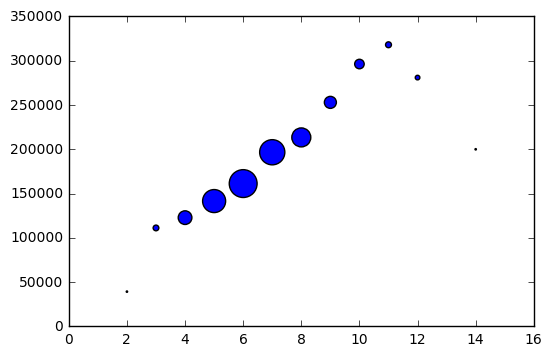

In [13]:
# Aggregated TotRmsAbvGrd(mean) vs SalePrice
plt.scatter(df.groupby('TotRmsAbvGrd').mean().index,df.groupby('TotRmsAbvGrd').SalePrice.mean(),s=df.groupby('TotRmsAbvGrd').SalePrice.count())

#### We can see positive correlations for all these 9 features. 'Fireplaces' and 'HalfBath' are numeric data, but they are actually numeric categorical data. So they are going to be treated with ANOVA analysis with other Categorical data columns.

### ANOVA for categorical data
1. List all the categorical data columns
2. ANOVA for every column
3. Get the list of features with enough significance.

* #### Get the categorical data columns

In [14]:
# get all columns list, and numeric column list:
all_cols = list(df_no_SP.columns)
num_cols = list(corr_all.columns)

# get categorical columns list
all_cols[:] = [ item for i,item in enumerate(all_cols) if item not in num_cols ]
cat_cols = all_cols

print(cat_cols)
print(len(cat_cols))
# Some features (GarageQual...) is actually numerical, but can be treated as categorical features.

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


* #### ANOVA for every categorical columns
* r squared tells how much variance in the target is explained by the model. the model explain 20% variance in the price.
* if the categorical is tobe predicted, use **logistic regression**. step function. 

In [15]:
from statsmodels.formula.api import ols
model = ols('SalePrice ~ PavedDrive', df).fit()
print(model.summary(),'\n\n')
# print(model.f_test([0, 1,-1,0]))
print(model.rsquared)
## http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
# get the r2 and pvalues. 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     42.02
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.80e-18
Time:                        21:13:28   Log-Likelihood:                -18503.
No. Observations:                1460   AIC:                         3.701e+04
Df Residuals:                    1457   BIC:                         3.703e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         1.15e+05   8148.003     

* #### Loop through all the categorical factors, and get the r_squared values.
* List the R_squared values from high to low

In [16]:
factor_R = {}
for factor in cat_cols:
    model = ols('SalePrice ~'+factor, df).fit()
# print(model.summary(),'\n\n')
    factor_R[factor] = model.rsquared
r_df = pd.DataFrame(list(factor_R.items()),columns=['factor','R_squared']).sort_values(by=['R_squared'],ascending=False)
r_df.index = r_df['factor']
r_df = r_df.drop('factor',axis=1)
print(r_df)


               R_squared
factor                  
Neighborhood    0.545575
ExterQual       0.477388
KitchenQual     0.456599
BsmtQual        0.453756
PoolQC          0.448651
Alley           0.285497
GarageFinish    0.267276
Foundation      0.256368
GarageType      0.206638
HeatingQC       0.195500
BsmtFinType1    0.192598
MasVnrType      0.187893
Exterior2nd     0.153830
Exterior1st     0.152773
SaleType        0.137287
SaleCondition   0.135497
BsmtExposure    0.130416
MiscFeature     0.114605
FireplaceQu     0.113142
MSZoning        0.107560
HouseStyle      0.086313
LotShape        0.076376
CentralAir      0.063166
Electrical      0.059673
RoofStyle       0.057697
PavedDrive      0.054540
Fence           0.050864
BldgType        0.034534
Condition1      0.032631
RoofMatl        0.031413
BsmtCond        0.028808
GarageQual      0.027106
GarageCond      0.027026
LandContour     0.025794
ExterCond       0.023618
LotConfig       0.021019
Functional      0.016480
Heating         0.014437


# A template for factorplot with sns
g = sns.factorplot(x="Fireplaces", y="SalePrice", data=df,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)

## Split our data into Train and Test

In [18]:
import numpy as np
from sklearn.cross_validation import train_test_split

y = df.SalePrice
X = df[['GarageArea','TotalBsmtSF','YearBuilt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)




(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          3.,   2.,   2.,   4.,   5.,   3.,   5.,   6.,   5.,  27.,  30.,
         49.,  45.,  29.,  17.,  11.,   9.,   7.,   9.,   5.,   1.,   2.,
          0.,   2.,   2.,   2.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([-259180. , -247996.4, -236812.8, -225629.2, -214445.6, -203262. ,
        -192078.4, -180894.8, -169711.2, -158527.6, -147344. , -136160.4,
        -124976.8, -113793.2, -102609.6,  -91426. ,  -80242.4,  -69058.8,
         -57875.2,  -46691.6,  -35508. ,  -24324.4,  -13140.8,   -1957.2,
           9226.4,   20410. ,   31593.6,   42777.2,   53960.8,   65144.4,
          76328. ,   87511.6,   98695.2,  109878.8,  121062.4,  132246. ,
         143429.6,  154613.2,  165796.8,  176980.4,  188164. ,  199347.6,
         210531.2,  221714.8,  232898.4,  244082. ,  255265.6,  266449.2,
         277632.8,  288816.4,  300000. ]),
 <a list of 50 Patch ob

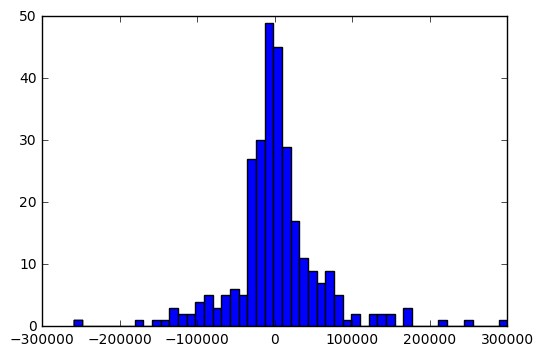

In [19]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
predict_price = clf.predict(X_test)
# print(predict_price)
plt.hist(predict_price-y_test,bins=50)


# GarageArea        0.623431  5.265038e-158
# TotalBsmtSF       0.613581  9.484229e-152
# TotRmsAbvGrd      0.533723  2.772281e-108
# YearBuilt         0.522897  2.990229e-103
# Fireplaces 

In [20]:
from sklearn.metrics import r2_score
# print(len(y),len(predict_price))
score = r2_score(y_test, predict_price)
print(score)

0.550652460781


### Clean up the dataframe
#### There are some categories contain much less valid data than most others. These categories will be removed. 
![Categories to be removed frome DataFrame](C://Users/qcyus/Pictures/Image for Jupyter/1.png)




In [21]:
df_noshort=df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],1)
print(df_noshort.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

(array([   5.,   11.,   13.,   61.,   58.,  126.,  165.,  180.,  122.,
         130.,  121.,   78.,   61.,   64.,   49.,   36.,   36.,   25.,
          13.,   25.,   16.,   11.,    4.,   11.,    9.,    5.,    4.,
           4.,    4.,    2.,    1.,    1.,    1.,    0.,    1.,    0.,
           2.,    0.,    1.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([  34900.,   49302.,   63704.,   78106.,   92508.,  106910.,
         121312.,  135714.,  150116.,  164518.,  178920.,  193322.,
         207724.,  222126.,  236528.,  250930.,  265332.,  279734.,
         294136.,  308538.,  322940.,  337342.,  351744.,  366146.,
         380548.,  394950.,  409352.,  423754.,  438156.,  452558.,
         466960.,  481362.,  495764.,  510166.,  524568.,  538970.,
         553372.,  567774.,  582176.,  596578.,  610980.,  625382.,
         639784.,  654186.,  668588.,  682990.,  697392.,  711794.,
         726196.,  740598.,  755000.]),
 <a list of 50 P

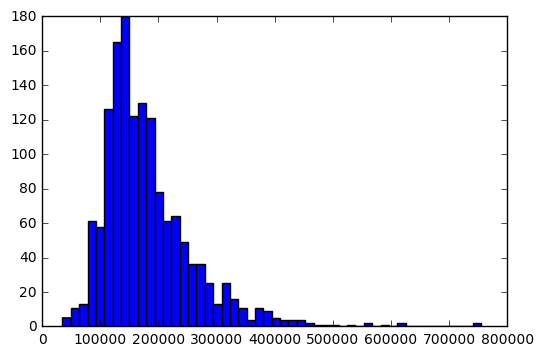

In [22]:
plt.hist(df.SalePrice,bins=50)

### convert all the Categorical Data to Dummy Variables
### Fill the NAN values with 0.

In [23]:
import numpy as np
from sklearn.cross_validation import train_test_split
def preprocess_features(X):
    '''   converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame(empty)
    output = pd.DataFrame(index = X.index)
     
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        #print(col,col_data)

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
#             print(col,'categorical')
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

# y =  log( df_new.price+1)#.fillna(0)
df_clean = df_noshort.fillna(0)

# y = df.SalePrice
# X = df.loc[:,df.columns != 'Saleprice'] 
y = np.log(df_clean.SalePrice)
X = df_clean.loc[:,df_clean.columns != 'SalePrice'] 

# X_all is df all numeric, and no "SalePrice"
X_all = preprocess_features(X)
X_all.info()

# Split the targets into training/testing sets

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.20, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 282 entries, Id to SaleCondition_Partial
dtypes: float64(248), int64(34)
memory usage: 3.1 MB


### This is the most important part.
#### * We choose a model
#### * Feed the model with Training data(X_train, y_train)
#### * Use the model to predict the Test data
#### * Score the model result, and Plot it.

0.868216553293


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   1.,   2.,   2.,
          2.,   5.,   8.,   8.,  12.,  16.,  13.,  23.,  39.,  33.,  35.,
         22.,  21.,   5.,   6.,  13.,   7.,   5.,   1.,   1.,   0.,   1.,
          2.,   0.,   1.,   0.,   0.,   1.]),
 array([ -8.91248390e-01,  -8.62496036e-01,  -8.33743681e-01,
         -8.04991327e-01,  -7.76238972e-01,  -7.47486618e-01,
         -7.18734263e-01,  -6.89981909e-01,  -6.61229554e-01,
         -6.32477200e-01,  -6.03724845e-01,  -5.74972490e-01,
         -5.46220136e-01,  -5.17467781e-01,  -4.88715427e-01,
         -4.59963072e-01,  -4.31210718e-01,  -4.02458363e-01,
         -3.73706009e-01,  -3.44953654e-01,  -3.16201300e-01,
         -2.87448945e-01,  -2.58696591e-01,  -2.29944236e-01,
         -2.01191882e-01,  -1.72439527e-01,  -1.43687172e-01,
         -1.14934818e-01,  -8.61824634e-02,  -5.74301088e-02,
         -2.86777543e-02,   7.46002301

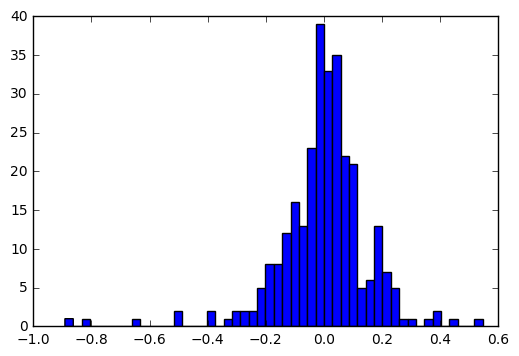

In [24]:
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor



# clf = tree.DecisionTreeRegressor()
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
clf = RandomForestRegressor()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# print(len(y),len(predict_price))
score = r2_score(y_test, y_pred)
# precision  = metrics.precision_score(y_test,y_pred)
# accuracy  = metrics.accuracy_score(y_test,y_pred)
print(score)
# print('Precision:',precision,'   Accuracy:',accuracy)
plt.hist(y_test-y_pred,bins=50)

### Try different Train size, and find the minimum size for a good enough prediction score.
#### 1. Create train data with different size (from existing trainning data, we want to keep the test data stay the same)
#### 2. Test the model with these train data, and record the scores

In [25]:
print(X_train.head().index)
print(y_train.head())
print(y_train[X_train.head().index])

Int64Index([254, 1066, 638, 799, 380], dtype='int64')
254     11.884489
1066    12.089539
638     11.350407
799     12.072541
380     11.751942
Name: SalePrice, dtype: float64
254     11.884489
1066    12.089539
638     11.350407
799     12.072541
380     11.751942
Name: SalePrice, dtype: float64


0
1
2
3
4
5
6
7
8
9


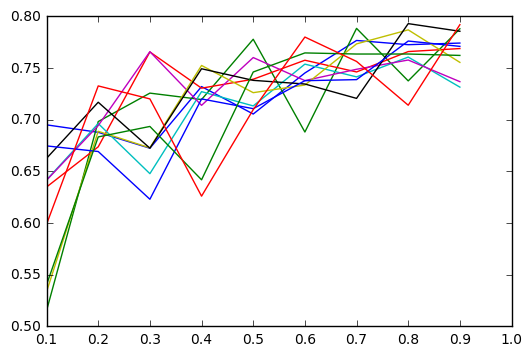

In [26]:
# Try each test size 200 times, and get the average.
#############################################################
# 1. prepare the training data with 9 sizes (from 0.1 ~ 0.9 of the original training data)
def size_test():    
    from sklearn.metrics import r2_score
    from sklearn import tree
    from sklearn.ensemble import RandomForestRegressor

    X = X_train
    y = y_train
    len_train = len(X)
    train_sizes_percent = np.arange(0.1,1,0.1)
    scores={}
    for i in range(9):
    #     size = int(round(len_train*train_sizes_percent[i]))#original training data times the size portion, round it(117.0), 
                                                           #and convert to int(117)
    #     X_train_sizetest = X.iloc[0:size]
    #     y_train_sizetest = y.iloc[0:size]
        X_train_sizetest = X.sample(frac=train_sizes_percent[i])
        y_train_sizetest = y[X_train_sizetest.index]
        score_list =[]
    # 2. test each size for j(200) times. then get the average score, store it in the SCORE dictionary
        for j in range(20):
            clf = tree.DecisionTreeRegressor()
            clf = clf.fit(X_train_sizetest, y_train_sizetest)
            y_pred = clf.predict(X_test)
            score = r2_score(y_test, y_pred)
            score_list.append(score)
        score_average = np.sum(score_list)/len(score_list)

        scores[train_sizes_percent[i]]=score_average
    scores_df = pd.DataFrame.from_dict(scores,orient='index').sort_index(axis=0)
    
    return(scores_df)

for i in range(10):
    score_record_df=pd.DataFrame()
    scores_df=size_test()
    if i == 0:
        score_record_df = scores_df
    else:
        score_record_df=pd.concat([score_record_df,scores_df])
    print(i)
    plt.plot(scores_df)

    

### short summary for cells above

### Now we fix the training size to 6% of the total training data, and choose different Prediction Models to find out which model is the best.
### Models including:
- DecisionTreeRegressor(`from sklearn import tree`)
- RandomForestRegressor(`from sklearn.ensemble import RandomForestRegressor`)
- LinearRegression (`from sklearn.linear_model import LinearRegression`)
- 神经网络
- SVR

In [27]:
# from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X_train_formodel = X_train.sample(frac=0.90)
y_train_formodel = y_train[X_train_formodel.index]
model_scores={}
clfs={'tree':tree.DecisionTreeRegressor(),'frst':RandomForestRegressor(),'linear':LinearRegression()}
# clfs = [tree.DecisionTreeRegressor(),RandomForestRegressor(),LinearRegression()]
# try k-nearest neighbour(take all the data, define distance matrix), 
#     svr(looks for dimension of the data, find the plane that cut the data into different categories)


# ###############  Problem  #####################
# # when the 

In [28]:

best_model_list=[]
score_df=pd.DataFrame()

############## Try the model_scoring for n times ##################
for n in range(50):
    for model_name in clfs.keys():
        clf = clfs[model_name]
        score=[]
        for i in range(20):
            clf=clf.fit(X_train_formodel,y_train_formodel)
            y_pred = clf.predict(X_test)
            score_i = r2_score(y_test, y_pred)
            score.append(score_i)
        model_scores[model_name]=sum(score)/len(score)
    print(model_scores)
    
    max_value = max(model_scores.values()) 
    max_key   = [k for k, v in model_scores.items() if v == max_value][0]
    best_model_list.append(max_key)

best_model_count = {x:best_model_list.count(x) for x in set(best_model_list)}
print(best_model_count)



    
###############  Problem  #####################
# when the 

{'frst': 0.86507640577758593, 'linear': 0.90510946085830779, 'tree': 0.76349120803721182}
{'frst': 0.86342423281096514, 'linear': 0.90510946085830779, 'tree': 0.75252678402619588}
{'frst': 0.86742852704405959, 'linear': 0.90510946085830779, 'tree': 0.74857569242571054}
{'frst': 0.86642608629297269, 'linear': 0.90510946085830779, 'tree': 0.75842105019131201}
{'frst': 0.86726623196482444, 'linear': 0.90510946085830779, 'tree': 0.76185102785306258}
{'frst': 0.86312718048256321, 'linear': 0.90510946085830779, 'tree': 0.75063658203710193}
{'frst': 0.86517769990084648, 'linear': 0.90510946085830779, 'tree': 0.76131715366144825}
{'frst': 0.86670163870351957, 'linear': 0.90510946085830779, 'tree': 0.76137793304389256}
{'frst': 0.86672627681843795, 'linear': 0.90510946085830779, 'tree': 0.75478281622544274}
{'frst': 0.86676993046337414, 'linear': 0.90510946085830779, 'tree': 0.75942133303912807}
{'frst': 0.86306606998332536, 'linear': 0.90510946085830779, 'tree': 0.75701298106404313}
{'frst': 0

### For the same training dataset, the comparison between the 3 models are consistent. 
### Now we are going to test the models when the training dataset is changing

In [29]:
# from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


model_scores={}
clfs={'tree':tree.DecisionTreeRegressor(),'frst':RandomForestRegressor(),'linear':LinearRegression()}

# try k-nearest neighbour(take all the data, define distance matrix), 
#     svr(looks for dimension of the data, find the plane that cut the data into different categories)

best_model_list=[]
score_df=pd.DataFrame()

############## Try the model_scoring for n times ##################
for n in range(50):
    X_train_formodel = X_train.sample(frac=0.90)
    y_train_formodel = y_train[X_train_formodel.index]
    for model_name in clfs.keys():
        clf = clfs[model_name]
        score=[]
        for i in range(20):
            clf=clf.fit(X_train_formodel,y_train_formodel)
            y_pred = clf.predict(X_test)
            score_i = r2_score(y_test, y_pred)
            score.append(score_i)
        model_scores[model_name]=sum(score)/len(score)
    print(model_scores)
    if n==0:
        score_df=pd.DataFrame.from_dict(model_scores,orient='index').transpose()
    else:
        score_df=score_df.append(pd.DataFrame.from_dict(model_scores,orient='index').transpose())
    
    max_value = max(model_scores.values()) 
    max_key   = [k for k, v in model_scores.items() if v == max_value][0]
    best_model_list.append(max_key)

best_model_count = {x:best_model_list.count(x) for x in set(best_model_list)}
print(best_model_count)
print(score_df)



    
###############  Problem  #####################
# when the 

{'frst': 0.86790161683588196, 'linear': 0.91017357263123022, 'tree': 0.79754646829931486}
{'frst': 0.86501514651152167, 'linear': 0.90727539646070476, 'tree': 0.71394540072328516}
{'frst': 0.87166618111758276, 'linear': 0.91266481597059579, 'tree': 0.75956608204507081}
{'frst': 0.8664475917456308, 'linear': 0.91003936540339259, 'tree': 0.77244074548221775}
{'frst': 0.86748233776966066, 'linear': 0.9070485416174916, 'tree': 0.74684452161765336}
{'frst': 0.86501387020904486, 'linear': 0.91141527291156854, 'tree': 0.78669448603361691}
{'frst': 0.86424119177853931, 'linear': 0.90801129423084104, 'tree': 0.77276831716966066}
{'frst': 0.86554563848137389, 'linear': 0.90573924591693034, 'tree': 0.73575487252054805}
{'frst': 0.864488417076126, 'linear': 0.89726098044602021, 'tree': 0.73650622711775138}
{'frst': 0.86535559357171188, 'linear': 0.89209618901753096, 'tree': 0.73980702502864859}
{'frst': 0.86403382829846154, 'linear': 0.90508046941315035, 'tree': 0.74113582282812696}
{'frst': 0.868

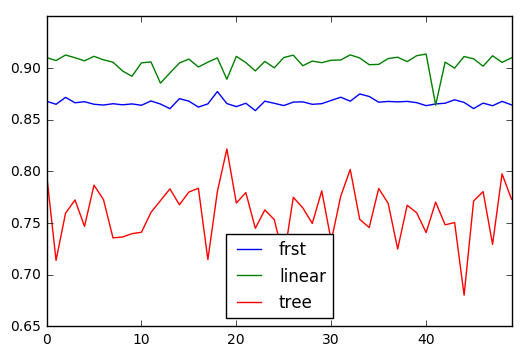

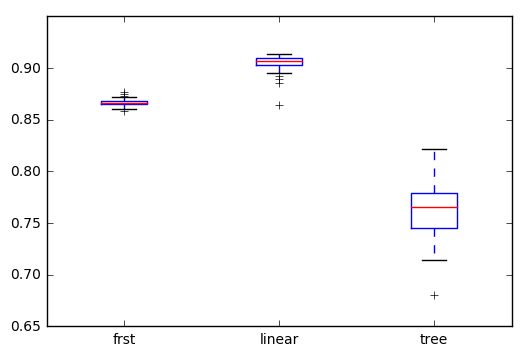

In [30]:
score_df.index=np.arange(0,50)
score_df.plot()
score_df.plot.box()

In [31]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
# from sklearn.cross_validation import KFold

# kf = KFold(n_splits=10)
kf = RepeatedKFold(n_splits=10,n_repeats=5)
model_scores={}
clfs={'tree':tree.DecisionTreeRegressor(),'frst':RandomForestRegressor(),'linear':LinearRegression()}

# try k-nearest neighbour(take all the data, define distance matrix), 
#     svr(looks for dimension of the data, find the plane that cut the data into different categories)

best_model_list=[]
score_df=pd.DataFrame()

############## Try the model_scoring for n times ##################
for train_index, test_index in kf.split(X_train):
#     print(X_train.shape)
#     print(len(train_index),len(test_index))
    
    X_train_formodel,X_test_formodel = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_formodel,y_test_formodel = y_train.iloc[train_index], y_train.iloc[test_index]
    for model_name in clfs.keys():
        clf = clfs[model_name]
        score=[]
        for i in range(20):
            clf=clf.fit(X_train_formodel,y_train_formodel)
            y_pred = clf.predict(X_test_formodel)
            score_i = r2_score(y_test_formodel, y_pred)
            score.append(score_i)
        model_scores[model_name]=sum(score)/len(score)
    print(model_scores)
    if n==0:
        score_df=pd.DataFrame.from_dict(model_scores,orient='index').transpose()
    else:
        score_df=score_df.append(pd.DataFrame.from_dict(model_scores,orient='index').transpose())
    
    max_value = max(model_scores.values()) 
    max_key   = [k for k, v in model_scores.items() if v == max_value][0]
    best_model_list.append(max_key)

best_model_count = {x:best_model_list.count(x) for x in set(best_model_list)}
print(best_model_count)
# print(score_df)



    
###############  Problem  #####################
# when the 


(1168, 282)
1051 117
{'frst': 0.89039445820881691, 'linear': 0.80232997576984533, 'tree': 0.83540316069571452}
(1168, 282)
1051 117
{'frst': 0.82378339608792595, 'linear': 0.49961429947879299, 'tree': 0.75193204801423397}
(1168, 282)
1051 117
{'frst': 0.90180380551203321, 'linear': 0.92153323010005983, 'tree': 0.70695948675107778}
(1168, 282)
1051 117
{'frst': 0.82870720549555732, 'linear': 0.89155581207197943, 'tree': 0.63246352829337871}
(1168, 282)
1051 117
{'frst': 0.78752407324251639, 'linear': 0.8562192592536062, 'tree': 0.69379884969354122}
(1168, 282)
1051 117
{'frst': 0.83981698249173764, 'linear': 0.90503109636340862, 'tree': 0.66636252950191932}
(1168, 282)
1051 117
{'frst': 0.82673762436126963, 'linear': 0.91687022970691923, 'tree': 0.60044178692840156}
(1168, 282)
1051 117
{'frst': 0.81151209146611125, 'linear': 0.73532953210136043, 'tree': 0.58342640542598045}
(1168, 282)
1052 116
{'frst': 0.84538392810269836, 'linear': 0.90838453897707061, 'tree': 0.79397662119959389}
(1

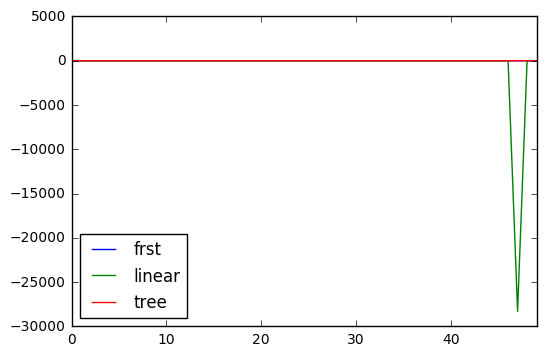

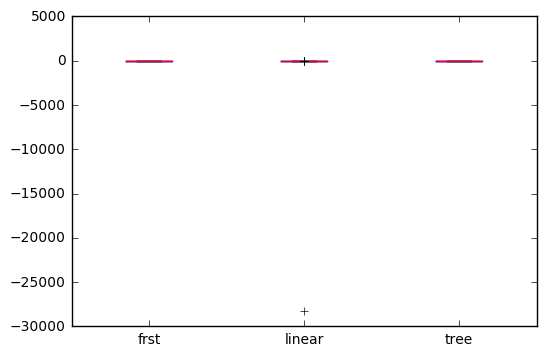

In [32]:
score_df.index=np.arange(0,50)
score_df.plot()
score_df.plot.box()

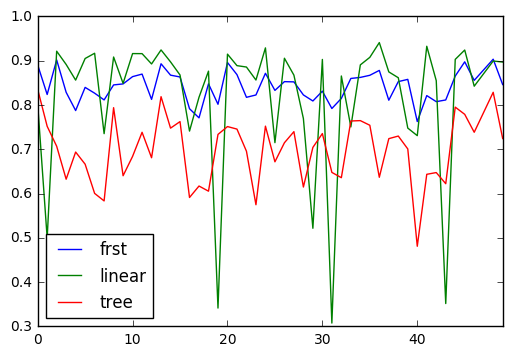

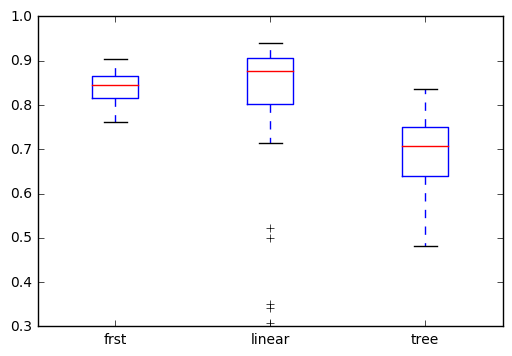

In [53]:
score_df_true=score_df.loc[score_df['linear']>0]
score_df_true.plot()
score_df_true.plot.box()

## Meeting Note: March 07, 2018
### cross-validation :http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- use all the training data(split into train and test)
http://scikit-learn.org/stable/modules/grid_search.html

In [33]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
 
    score = r2_score(y_true, y_predict)
 
    return score

In [34]:
#  Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

# Define performace_metric 
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score


# GridSearch the best parameter for the model
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
#     cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11),'min_samples_leaf':[2,4,10,20]}
    

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_,grid.best_score_
#     return grid


### Find the best Parameters for DecisionTreeRegressor using GridSearchCV

In [42]:
#  Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

# Define performace_metric 
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score


# GridSearch the best parameter for the model
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_DecisionTreeRegressor(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
#     cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 20),'min_samples_leaf':range(1,20)}
    

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_,grid.best_score_
#     return grid


best_tree=fit_DecisionTreeRegressor(X_train,y_train)

print(best_tree)

score = r2_score(y_test,best_tree[0].predict(X_test))# best_tree is a tuple. The model is the first element in best_tree
print('Best_Tree Score:',score)

(DecisionTreeRegressor(criterion='mse', max_depth=16, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), 0.76470917287735851)


AttributeError: 'tuple' object has no attribute 'predict'

In [47]:
score = r2_score(y_test,best_tree[0].predict(X_test))
print('Best_Tree Score:',score)

Best_Tree Score: 0.805775223394


## Find the best Parameters for RandomForestRegressor using GridSearchCV

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_RandomForestRegressor(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
#     cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'n_estimators': range(5, 20),'max_depth':range(1,15),'min_samples_leaf':range(1,20)}
    

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_,grid.best_score_
#     return grid


best_forest=fit_RandomForestRegressor(X_train,y_train)

print(best_forest)
score = r2_score(y_test,best_forest.predict(X_test))
print('Best_Forest Score:',score)

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 0.85824687988613879)


AttributeError: 'tuple' object has no attribute 'predict'

In [48]:
score = r2_score(y_test,best_forest[0].predict(X_test))
print('Best_Forest Score:',score)

Best_Forest Score: 0.875894170226


## Compare the models with adjusted parameters

{'frst': 0.80410179839581652, 'linear': 0.57862087311363253, 'tree': 0.7030266313249105}
{'frst': 0.81858789095813356, 'linear': 0.88421961565767437, 'tree': 0.73700015761324644}
{'frst': 0.87561830323428735, 'linear': 0.86962956735649011, 'tree': 0.81484188695502124}
{'frst': 0.88010070405076635, 'linear': 0.90523144590166493, 'tree': 0.83361144992849945}
{'frst': 0.8832839798998906, 'linear': 0.92691815216697437, 'tree': 0.78804869171487846}
{'frst': 0.842299070146448, 'linear': 0.75064234869867075, 'tree': 0.7452963764693481}
{'frst': 0.83429713912319292, 'linear': 0.8959316037747268, 'tree': 0.72673694248207821}
{'frst': 0.81860722756318405, 'linear': 0.73623749331405031, 'tree': 0.70879254257874513}
{'frst': 0.8542421759933928, 'linear': 0.90093983562665303, 'tree': 0.74852083503919076}
{'frst': 0.86884637526543784, 'linear': 0.856447282628922, 'tree': 0.82247315190797143}
{'frst': 0.84023463105259444, 'linear': 0.85223681406135676, 'tree': 0.75307538651844608}
{'frst': 0.86627254

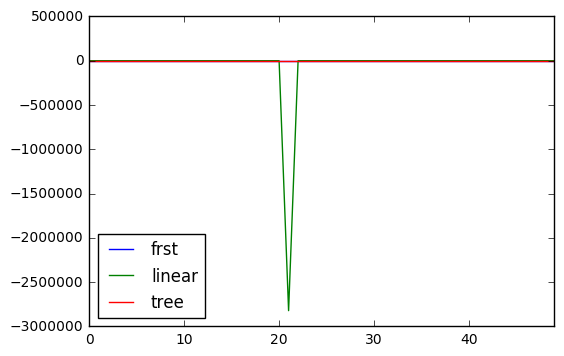

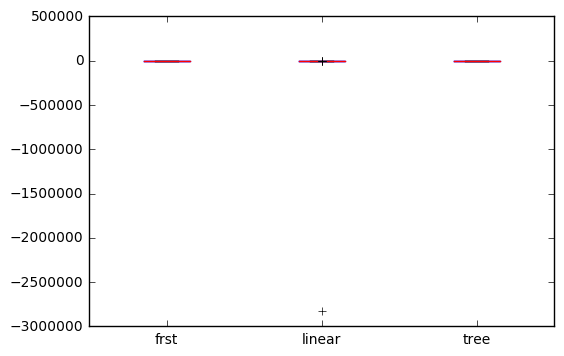

In [54]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
# from sklearn.cross_validation import KFold

# kf = KFold(n_splits=10)
kf = RepeatedKFold(n_splits=10,n_repeats=5)
model_scores={}
clfs={'tree':tree.DecisionTreeRegressor(criterion='mse', max_depth=16, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
      'frst':RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
      'linear':LinearRegression()}

# try k-nearest neighbour(take all the data, define distance matrix), 
#     svr(looks for dimension of the data, find the plane that cut the data into different categories)

best_model_list=[]
score_df=pd.DataFrame()

############## Try the model_scoring for n times ##################
for train_index, test_index in kf.split(X_train):
#     print(X_train.shape)
#     print(len(train_index),len(test_index))
    
    X_train_formodel,X_test_formodel = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_formodel,y_test_formodel = y_train.iloc[train_index], y_train.iloc[test_index]
    for model_name in clfs.keys():
        clf = clfs[model_name]
        score=[]
        for i in range(20):
            clf=clf.fit(X_train_formodel,y_train_formodel)
            y_pred = clf.predict(X_test_formodel)
            score_i = r2_score(y_test_formodel, y_pred)
            score.append(score_i)
        model_scores[model_name]=sum(score)/len(score)
    print(model_scores)
    if n==0:
        score_df=pd.DataFrame.from_dict(model_scores,orient='index').transpose()
    else:
        score_df=score_df.append(pd.DataFrame.from_dict(model_scores,orient='index').transpose())
    
    max_value = max(model_scores.values()) 
    max_key   = [k for k, v in model_scores.items() if v == max_value][0]
    best_model_list.append(max_key)

best_model_count = {x:best_model_list.count(x) for x in set(best_model_list)}
print(best_model_count)
# print(score_df)


score_df.index=np.arange(0,50)
score_df.plot()
score_df.plot.box()    



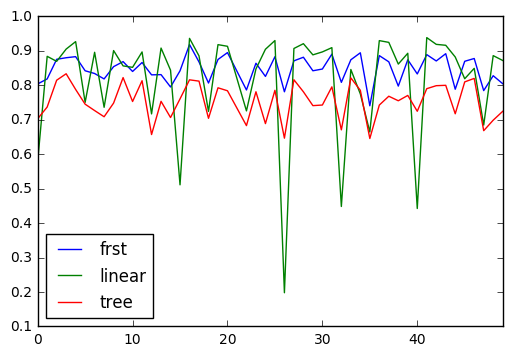

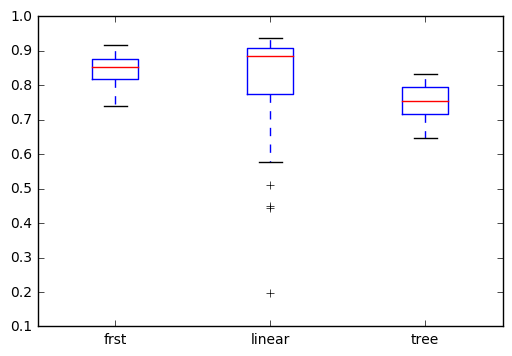

In [55]:
score_df_true=score_df.loc[score_df['linear']>0]
score_df_true.plot()
score_df_true.plot.box()

In [ ]:
score = r2_score(y_test, best.predict(X_test))

In [ ]:
range(1，10)

## Meeting note Feb 28
### change the parameters in the training models.
#### a way to determine if it is outfit: 
### grid search
### k-fold cross validation
### try random forest(number of trees about half of the number of the features)
### boxplot the performance for different parameter of the model
### define the random_state

## Meeting Note Mar 21
### 'importance' gives the features ranking 
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
### Barplot of all the features vs saleprice
### correlation < 0.5, >-0.5
### try remove the null values

In [ ]:
a=[1,1,1,1,1222,2,2,2,2,3,3,3,3,3,2]
d = {x:a.count(x) for x in a}
print(d)

# Note from Meeting on Nov. 29, 2017: plan for the next steps

### `scipy.stats.pearsonr(x, y)`

### barplot for all the numeric features with the sale price. 
#### if the p-value is high, it is possibly not related.

### category features, Use ANOVA to find the correlation for all of them.

### Sepreate data into two parts.
#### http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
```python
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=42)
```

### model: regression http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
> 1.10. Decision Trees¶

#### try several models, find what are the advantages and dis.
> decision trees

```python
>>> from sklearn import tree
>>> X = [[0, 0], [2, 2]]
>>> y = [0.5, 2.5]
>>> clf = tree.DecisionTreeRegressor()
>>> clf = clf.fit(X, y)
>>> clf.predict([[1, 1]])
```

### Measure the performance of the model

### Distribution of the SalePrice



Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


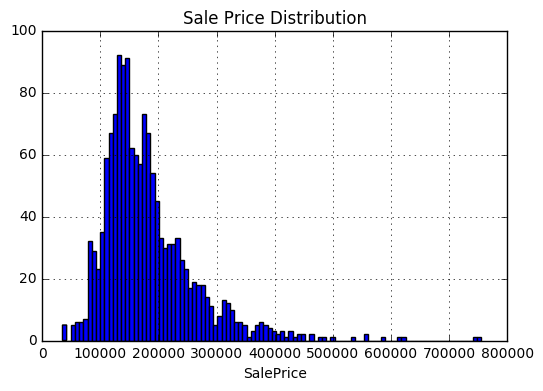

In [56]:
%pylab inline
ax = df['SalePrice'].hist(bins=100)
# ax.set_ylabel('Number of Passengers')
ax.set_xlabel('SalePrice')
ax.set_title('Sale Price Distribution')
pd.DataFrame(df['SalePrice'].describe())

,Id
Heating,
Floor,1
GasA,1428
GasW,18
Grav,7
OthW,2
Wall,4


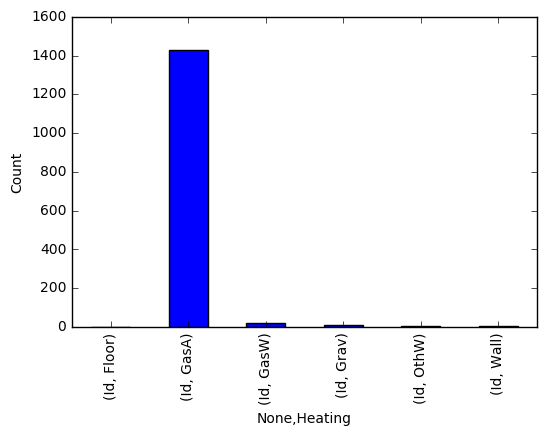

In [57]:
df.groupby(['Heating' ])[['Id']].count().unstack().plot(kind='bar').set_ylabel('Count')
df.groupby(['Heating' ])[['Id']].count()

Id
HouseStyle BldgType     
1.5Fin     1Fam      142
           2fmCon      8
           Duplex      4
1.5Unf     1Fam       13
           2fmCon      1
1Story     1Fam      607
           2fmCon      7
           Duplex     29
           Twnhs       5
           TwnhsE     78
2.5Fin     1Fam        7
           2fmCon      1
2.5Unf     1Fam        9
           2fmCon      2
2Story     1Fam      362
           2fmCon     11
           Duplex      9
           Twnhs      33
           TwnhsE     30
SFoyer     1Fam       20
           Duplex      9
           Twnhs       4
           TwnhsE      4
SLvl       1Fam       60
           2fmCon      1
           Duplex      1
           Twnhs       1
           TwnhsE      2

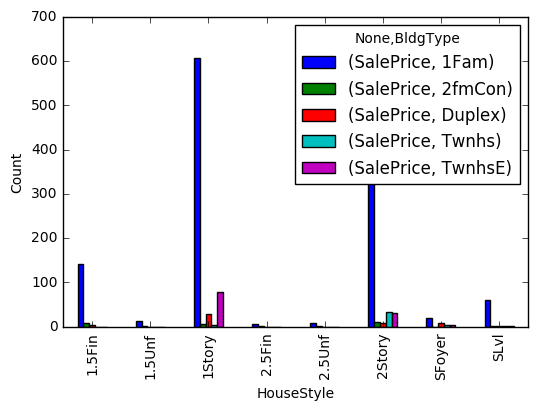

In [58]:
df.groupby(['HouseStyle','BldgType'])[['SalePrice']].count().unstack().plot(kind='bar').set_ylabel('Count')
df.groupby(['HouseStyle','BldgType'])[['Id']].count()

Id
Heating BldgType      
Floor   1Fam         1
GasA    1Fam      1195
        2fmCon      27
        Duplex      49
        Twnhs       43
        TwnhsE     114
GasW    1Fam        15
        2fmCon       3
Grav    1Fam         6
        2fmCon       1
OthW    1Fam         2
Wall    1Fam         1
        Duplex       3

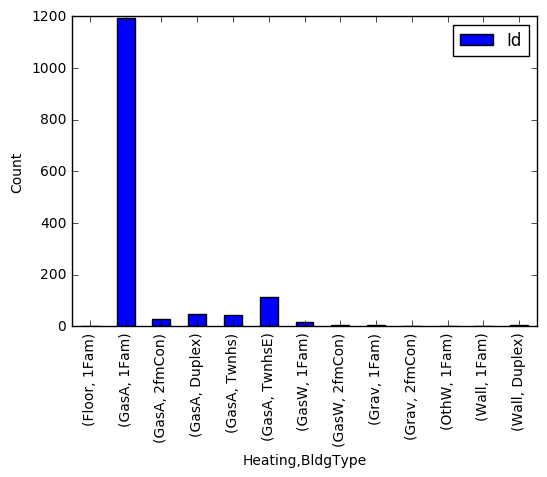

In [59]:
df.groupby(['Heating','BldgType'])[['Id']].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['Heating','BldgType'])[['Id']].count()

### YearBuilt VS SalePrice
#### 

<class 'numpy.int64'>
<class 'pandas.core.series.Series'>


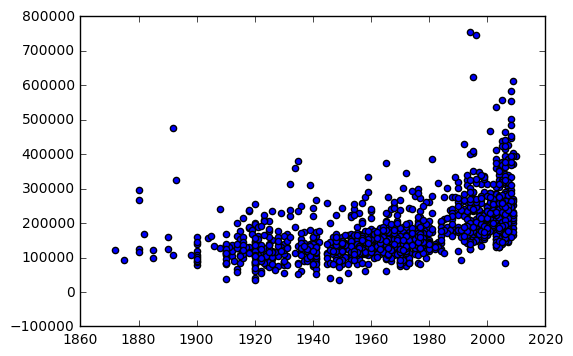

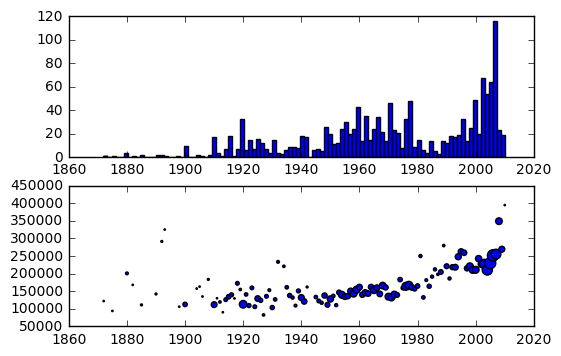

In [60]:
fig1 = plt.figure()
plt.scatter(df.YearBuilt, df.SalePrice)
# plt.show()
print(type(df.YearBuilt[0]))
# df.YearBuilt.plot(kind='hist')
fig2 = plt.figure()
plt.subplot(2,1,1)
plt.hist(df.YearBuilt,bins=100)
YearMean=df.groupby(['YearBuilt']).SalePrice.mean()
# print(YearMean.index)
YearSize=df.groupby(['YearBuilt']).SalePrice.count()
# print(YearSize)
plt.subplot(2,1,2)
# plt.scatter(df.YearBuilt.unique(),YearMean,s = YearSize)
plt.scatter(YearMean.index,YearMean,s=YearSize)
# plt.ylim(0,500000)
print(type(YearMean))
# YearMean.plot(kind='Scatter')

In [ ]:
import scipy.stats as stats
stats.pearsonr(df.YearBuilt, df.SalePrice)


### LotArea VS SalePrice
* log scale is used on the x-axis

(0, 50000)

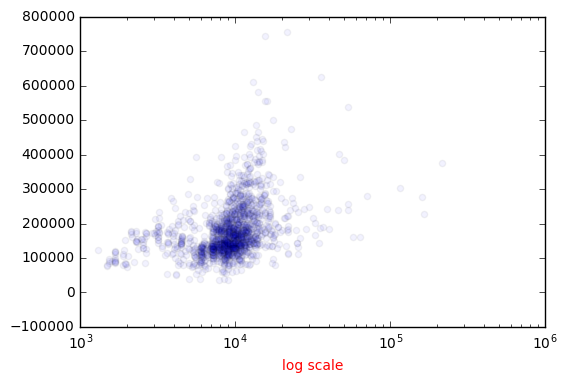

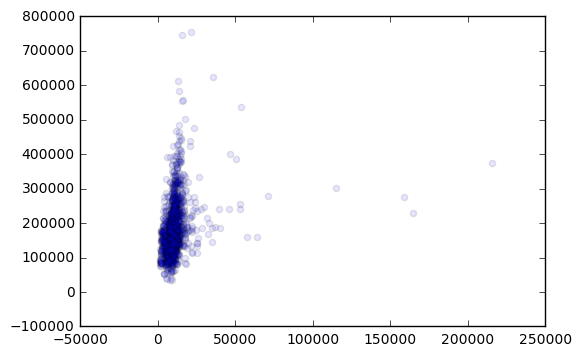

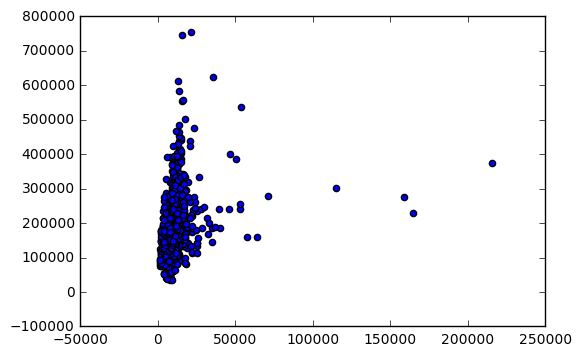

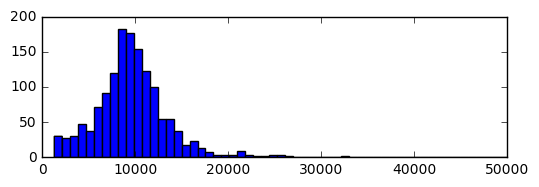

In [61]:
fig1 = plt.figure()
# ,alpha=0.05 sets the transparency of the dots
plt.scatter(df.LotArea, df.SalePrice,alpha=0.05)
plt.xscale('log')
plt.xlabel('log scale',color='r')
fig4 = plt.figure()
plt.scatter(df.LotArea,df.SalePrice,alpha=0.1)
fig3 = plt.figure()
plt.scatter(df.LotArea,df.SalePrice)

fig2 = plt.figure()
plt.subplot(2,1,1)
plt.hist(df.LotArea,bins = 250)
plt.xlim(0,50000)


### YearRemodAdd VS SalePrice
* The size of the scatter spot is related to the number of the data point in that year.
* Note that the YearRemodAdd data count in 1950 is two times higher than the maximum in all the other years, and there is no data entry for any year before 1950, which is obviously the result that all the YearRemodAdd earlier than 1950 was recorded as 1950. So that the use of 1950 data should be very careful. 

<class 'numpy.int64'>
<class 'pandas.core.series.Series'>


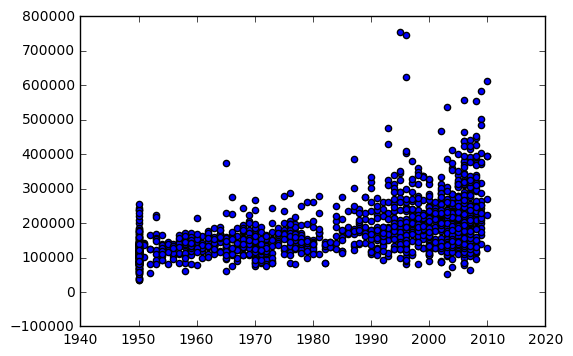

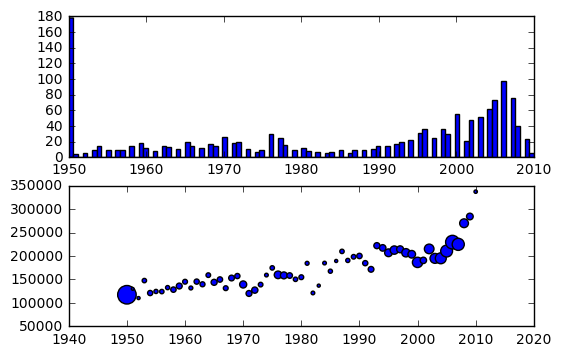

In [62]:
fig1 = plt.figure()
plt.scatter(df.YearRemodAdd, df.SalePrice)

print(type(df.YearRemodAdd[0]))

fig2 = plt.figure()
plt.subplot(2,1,1)
plt.hist(df.YearRemodAdd,bins=100)
YearMean=df.groupby(['YearRemodAdd']).SalePrice.mean()

YearSize=df.groupby(['YearRemodAdd']).SalePrice.count()

plt.subplot(2,1,2)
plt.scatter(YearMean.index,YearMean,s=YearSize)
# plt.ylim(0,500000)
print(type(YearMean))
# YearMean.plot(kind='Scatter')

### OverallQual VS SalePrice

(0.79098160058380507, 2.1856752679937747e-313)

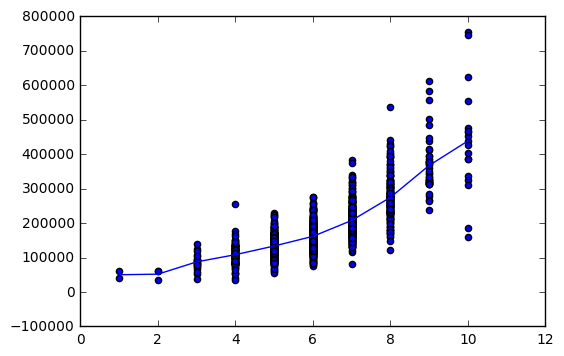

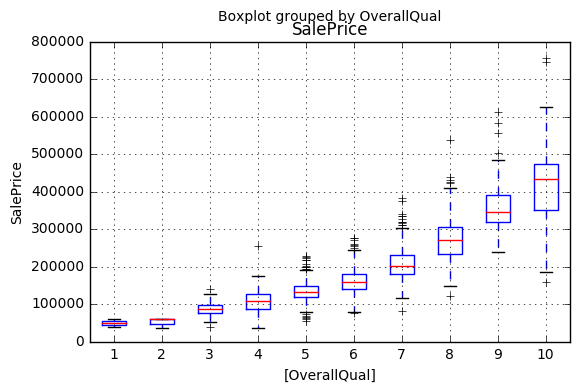

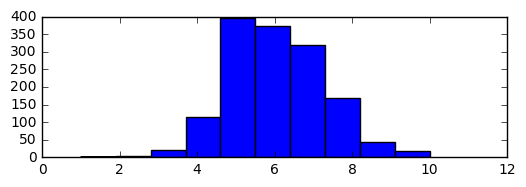

In [66]:
# print(df['OverallQual'])
fig1 = plt.figure()
plt.scatter(df.OverallQual, df.SalePrice)
group_SP = df.groupby('OverallQual').SalePrice
plt.plot(group_SP.mean().index,group_SP.mean())
fig3 = plt.figure()
# plt.boxplot(df.groupby('OverallQual').SalePrice)
df.boxplot(column=['SalePrice'],by = ['OverallQual'])
plt.ylabel('SalePrice')

# # plt.show()
# print(type(df.YearBuilt[0]))

fig2 = plt.figure()
plt.subplot(2,1,1)
plt.hist(df.OverallQual)


pd.DataFrame(df.groupby( ['OverallQual'])['SalePrice'].describe().loc[:,['count','mean','std']])
stats.pearsonr(df.OverallQual, df.SalePrice)
# pd.DataFrame(df.groupby( ['OverallQual'])['SalePrice'].describe())

### OverallCond VS SalePrice
* Coorealtion between OverallCond and SalePrice is not clear.

(-0.077855894048678001, 0.0029123512679157704)

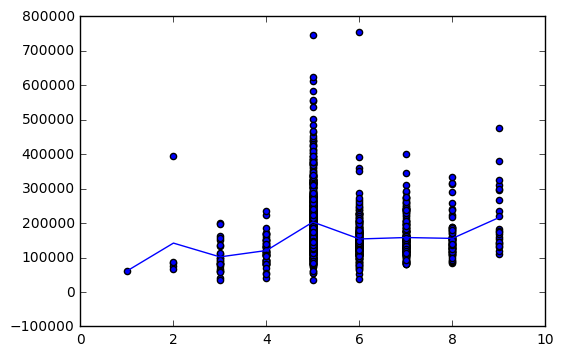

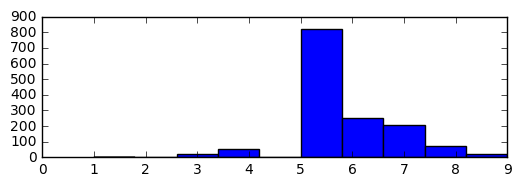

In [64]:

fig1 = plt.figure()
plt.scatter(df.OverallCond, df.SalePrice)
group_SP = df.groupby('OverallCond').SalePrice
plt.plot(group_SP.mean().index,group_SP.mean())
fig3 = plt.figure()
# plt.boxplot(df.groupby('OverallQual').SalePrice)
# df.boxplot(column=['SalePrice'],by = ['OverallCond'])
# plt.ylabel('SalePrice')

# # plt.show()
# print(type(df.YearBuilt[0]))

fig2 = plt.figure()
plt.subplot(2,1,1)
plt.hist(df.OverallCond)


pd.DataFrame(df.groupby( ['OverallQual'])['SalePrice'].describe().loc[:,['count','mean','std']])
stats.pearsonr(df.OverallCond, df.SalePrice)


### Neighborhood VS SalePrice


(array([ 6.,  6.,  4.,  5.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([   2. ,   24.3,   46.6,   68.9,   91.2,  113.5,  135.8,  158.1,
         180.4,  202.7,  225. ]),
 <a list of 10 Patch objects>)

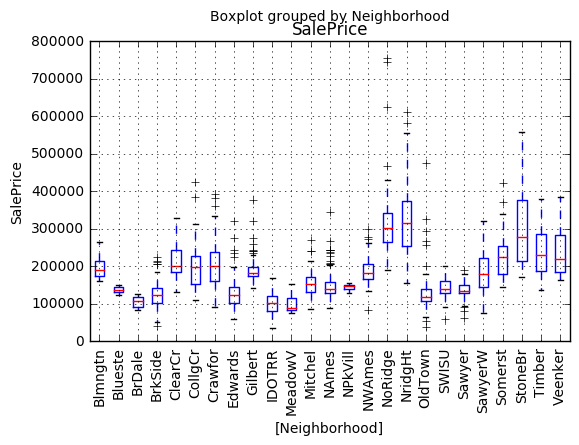

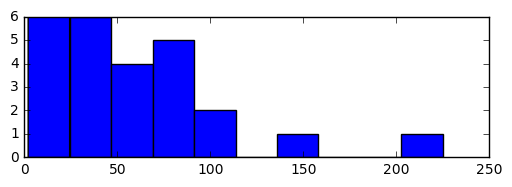

In [65]:

# fig1 = plt.figure()
# group_SP = df.groupby('Neighborhood').SalePrice
# plt.plot(group_SP.mean().index,group_SP.mean())
fig3 = plt.figure()

df.boxplot(column=['SalePrice'],by = ['Neighborhood'])
plt.ylabel('SalePrice')
plt.xticks(rotation=90)

fig2 = plt.figure()
plt.subplot(2,1,1)
plt.hist(df.groupby('Neighborhood').SalePrice.count())

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])
plt.ion()

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)

while True:
    plt.pause(0.05)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

KeyboardInterrupt: 